# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Wildan Septian]
- **Email:** [wildanseptian100@gmail.com]
- **ID Dicoding:** [wildan_septian_kXs1]

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan dan Revenue Perusahaan dalam beberapa bulan terakhir ?
- Produk Apa yang Banyak dan Paling sedikit Terjual ?

## Import Semua Packages/Library yang Digunakan

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat dataset geolocation_df

In [177]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

#### Memuat dataset order_items_df

In [178]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

#### Memuat dataset order_payments_df

In [179]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

#### Memuat dataset order_reviews_df

In [180]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

#### Memuat dataset order_df

In [181]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

#### Memuat dataset product_category_name_translation

In [182]:
product_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_translation_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

#### Memuat dataset product_df

In [183]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

#### Memuat dataset sellers_df

In [184]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

### Assessing Data

#### Menilai dataset geolocation_df

**Melihat informasi data**

In [185]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Melihat informasi data apabila ada missing**

In [186]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Melihat informasi data apabila ada duplicate**

In [187]:
print("Jumlah Duplikasi data : " ,geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah Duplikasi data :  261831


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

***Insight***

Hasil Dari Assessing Data geolocation_df yaitu dataset tersebut hanya terdapat duplikasi data.

#### Menilai dataset order_items_df

***Melihat Informasi data***

In [188]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


***Melihat informasi data Apablia ada missing*** 

In [189]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

***Melihat Informasi data Apabila ada Duplicate***

In [190]:
print("Jumlah Duplikasi : ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah Duplikasi :  0


order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

***Insight***

Hasil Dari Assessing Data order_items_df yaitu dataset tersebut tidak terdapat missing values,duplicate data ataupun kesalahan tipedata

#### Menilai dataset order_payments_df

***Melihat Informasi data***

In [191]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


***Melihat Informasi Data Apabila ada missing***

In [192]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

***Melihat Informasi Data Apabila ada Duplicate***

In [193]:
print("Jumlah Duplikasi : ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah Duplikasi :  0


payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

**Insight:**

Hasil Dari Assessing Data order_payments_df yaitu dataset tersebut tidak terdapat kesalahan tipe data, missing values ataupun duplicate data.

#### Menilai dataset order_reviews_df

***Melihat Informasi Data***

In [194]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


***MElihat Informasi Data Apabila ada missing***

In [195]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

***Melihat Informasi Data Apabila ada Duplicate***

In [196]:
print("Jumlah Duplikasi : ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah Duplikasi :  0


review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

**Insight:**

Hasil Dari Assessing Data order_reviews_df yaitu dataset tersebut terdapat kesalahan Tipe data yaitu di kolom review_creation_date dan review_answer_timestamp seharusnya kolom tersebut menggunakan tipe data datetime bukan object dan terdapat missing value pada kolom review_comment_title dan review_comment_message akan tetapi tidak terdapat duplicate data.

#### Menilai dataset orders_df

***Melihat Informasi Data***

In [197]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


***MElihat Informasi Data Apabila ada missing***

In [198]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

***Melihat Informasi data Apabila ada Duplicate***

In [199]:
print("Jumlah Duplikasi : ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah Duplikasi :  0


order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 19:36:48   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

**Insight:**

Hasil Dari Assessing Data orders_df yaitu dataset tersebut memiliki kesalahan tipe data pada kolom order_purchase_timestamp,order_approved_at, order_delivered_carrier_date, dan order_estimated_delivery_date kolom tersebut seharusnya bertipe data datetime bukan object serta memiliki missing values pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date akan tetapi tidak memiliki duplacate data.

#### Menilai dataset product_translation_df

***Melihat Informasi Data***

In [200]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


***MElihat Informasi Data Apabila ada missing***

In [201]:
product_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

***Melihat Informasi data Apabila ada Duplicate***

In [202]:
print("Jumlah Duplikasi : ", product_translation_df.duplicated().sum())
product_translation_df.describe()

Jumlah Duplikasi :  0


product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

**Insight:**

Hasil Dari Assessing Data product_translation_df yaitu dataset tersebut tidak terdapat kesalahan tipe data, missing values ataupun duplicate data.

#### Menilai dataset products_df

***Melihat Informasi Data***

In [203]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


***MElihat Informasi Data Apabila ada missing***

In [204]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

***Melihat Informasi data Apabila ada Duplicate***

In [205]:
print("Jumlah Duplakasi : ", products_df.duplicated().sum())
products_df.describe()

Jumlah Duplakasi :  0


product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

**Insight:**

Hasil Dari Assessing Data products_df yaitu dataset tersebut hanya terdapat missing values di semua kolom kecuali product_id.

#### Menilai dataset sellers_df

***Melihat Informasi Data***

In [206]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


***MElihat Informasi Data Apabila ada missing***

In [207]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

***Melihat Informasi data Apabila ada Duplicate***

In [208]:
print("Jumlah Duplikasi : ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah Duplikasi :  0


seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

**Insight:**

Hasil Dari Assessing Data order_payments_df yaitu dataset tersebut tidak terdapat kesalahan tipe data, missing values ataupun duplicate data.

### Cleaning Data

Setelah Proses Assesing data terdapat beberapa bagian yang harus di perbaiki dan di bersihkan, berikut adalah rangkuman dataset apa saja yang harus di perbaiki dan di ubah tipe data kolomnya 

1. Dataset geolocation_df
     - Terdapat duplicate data
2. Dataset order_reviews
     - Terdapat kesalahan penggunaan tipe data di kolom review_creation_date dan review_answer_timestamp seharusnya kolom tersebut menggunakan tipe data datetime bukan object. 
     - Terdapat missing values pada kolom review_comment_title dan review_comment_message.
3. Dataset orders_df
     - Terdapat kesalahan tipe data pada kolom order_purchase_timestamp,order_approved_at, order_delivered_carrier_date, dan order_estimated_delivery_date kolom tersebut seharusnya bertipe data datetime bukan object.
     - Terdapat missing values pada kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date.
4. Dataset products_df
   - Terdapat missing values di semua kolom dataset products_df kecuali kolom product_id.

#### Membersihkan Dataset geolocation_df

- Membersihkan duplicate data

In [209]:
geolocation_df.drop_duplicates(inplace=True)

***Memeriksa dan Melihat hasil pembersihan dataset yang duplicate***

In [210]:
print("Jumlah Duplikasi data : " ,geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah Duplikasi data :  0


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                738332.000000    738332.000000    738332.000000
mean                  38316.086800       -20.998353       -46.461098
std                   30632.496675         5.892315         4.393705
min                    1001.000000       -36.605374      -101.466766
25%                   12600.000000       -23.603061       -48.867822
50%                   29144.000000       -22.873588       -46.647278
75%                   65950.000000       -19.923336       -43.836974
max                   99990.000000        45.065933       121.105394

#### Membersihkan Dataset order_reviews_df

- **Mengubah tipe data pada kolom review_creation_date dan review_answer_timestamp menjadi tipe data datetime menggunakan function to_datetime().**

In [211]:
datetime_columns = ["review_creation_date","review_answer_timestamp"]

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

**Periksa apakah tipe data tersebut sudah berubah**

In [212]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


menampilkan 10 data awal untuk memeriksa apakah tipe data datetime sudah berfungsi

In [213]:
order_reviews_df.head(10)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
5  15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6  07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
7  7c6400515c67679fbee952a7525281ef  c31a859e34e3adac22f376954e19b39d   
8  a3f6f7f6f433de0aefbb97da197c554c  9c214ac970e84273583ab523dfafd09b   
9  8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   
5             1                  NaN   
6             5                  NaN   
7             5                  NaN   
8             5                  NaN   
9             4            recomendo   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   
5                                                NaN           2018-04-13   
6                                                NaN           2017-07-16   
7                                                NaN           2018-08-14   
8                                                NaN           2017-05-17   
9  aparelho eficiente. no site a marca do aparelh...           2018-05-22   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53  
5     2018-04-16 00:39:37  
6     2017-07-18 19:30:34  
7     2018-08-14 21:36:06  
8     2017-05-18 12:05:37  
9     2018-05-23 16:45:47

- **Menangani missing values pada kolom review_comments_title dan review_comments_message**

*Lihat terlebih dahulu informasi pada dataset order_reviews_df*

In [214]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


*Lihat Total missing value*

In [215]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

*Melihat isi data pada kolom review_comment_title* 

In [216]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN           2018-01-18   
1                                                    NaN           2018-03-10   
2                                                    NaN           2018-02-17   
3                  Recebi bem antes do prazo estipulado.           2017-04-21   
4      Parabéns lojas lannister adorei comprar pela I...           2018-03-01   
...                                                  ...                  ...   
99219                                                NaN           2018-07-07   
99220                                                NaN           2017-12-09   
99221  Excelente mochila, entrega super rápida. Super...           2018-03-22   
99222                                                NaN           2018-07-01   
99223  meu produto chegou e ja tenho que devolver, po...           2017-07-03   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[87656 rows x 7 columns]

*Melihat isi data pada kolom review_comment_messege*

In [217]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
5      15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6      07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
...                                 ...                               ...   
99217  c6b270c61f67c9f7cb07d84ea8aeaf8b  48f7ee67313eda32bfcf5b9c1dd9522d   
99218  af2dc0519de6e0720ef0c74292fb4114  d699c734a0b1c8111f2272a3f36d398c   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   

       review_score review_comment_title review_comment_message  \
0                 4                  NaN                    NaN   
1                 5                  NaN                    NaN   
2                 5                  NaN                    NaN   
5                 1                  NaN                    NaN   
6                 5                  NaN                    NaN   
...             ...                  ...                    ...   
99217             5                  NaN                    NaN   
99218             5                  NaN                    NaN   
99219             5                  NaN                    NaN   
99220             5                  NaN                    NaN   
99222             4                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
0               2018-01-18     2018-01-18 21:46:59  
1               2018-03-10     2018-03-11 03:05:13  
2               2018-02-17     2018-02-18 14:36:24  
5               2018-04-13     2018-04-16 00:39:37  
6               2017-07-16     2017-07-18 19:30:34  
...                    ...                     ...  
99217           2017-12-13     2017-12-14 11:09:36  
99218           2018-04-27     2018-04-30 01:18:57  
99219           2018-07-07     2018-07-14 17:18:30  
99220           2017-12-09     2017-12-11 20:06:42  
99222           2018-07-01     2018-07-02 12:59:13  

[58247 rows x 7 columns]

In [218]:
drop_columns = ["review_comment_title","review_comment_message"]
order_reviews_df = order_reviews_df.drop(drop_columns, axis=1)

In [219]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [220]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Membersihkan Dataset orders_df

- Mengubah tipe data pada kolom order_purchase_timestamp,order_approved_at, order_delivered_carrier_date, order_estimated_delivery_date dan order_estimated_delivery_date menjadi tipe data datetime memakai function to_datetime().

In [221]:
datetime_columns_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns_orders:
    orders_df[column] = pd.to_datetime(orders_df[column])

Memeriksa apakah tipe data sudah berubah 

In [222]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [223]:
orders_df.head(10)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
5    delivered      2017-07-09 21:57:05 2017-07-09 22:10:13   
6     invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
7    delivered      2017-05-16 13:10:30 2017-05-16 13:22:11   
8    delivered      2017-01-23 18:29:09 2017-01-25 02:50:47   
9    delivered      2017-07-29 11:55:02 2017-07-29 12:05:32   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   
5          2017-07-11 14:58:04           2017-07-26 10:57:55   
6                          NaT                           NaT   
7          2017-05-22 10:07:46           2017-05-26 12:55:51   
8          2017-01-26 14:16:31           2017-02-02 14:08:10   
9          2017-08-10 19:45:24           2017-08-16 17:14:30   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26  
5                    2017-08-01  
6                    2017-05-09  
7                    2017-06-07  
8                    2017-03-06  
9                    2017-08-23

- Menangani missing values pada kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date

Melihat Jumlah missing values dari dataset order_df

In [224]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

dilihat dari missing values tersebut tidak akan dapat melakukan imputation dan interpolation karna missing values tersebut berkaitan dengan tipedata waktu.
solusinya adalah droping karna mising values tersebut lebih sedikit apabila dibandingkan dengan data yang sudah tersedia.

In [225]:
orders_df.dropna(axis=0, inplace=True)

Melihat jumlah missing values apakah sudah berhasil melakukan droping

In [226]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan Dataset products_df

- Menangani missing values di semua kolom dataset products_df kecuali kolom product_id

In [227]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [228]:
products_df.dropna(axis=0, inplace=True)

In [229]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [230]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- Hasil dari cleanning

## Exploratory Data Analysis (EDA)

### Explore geolocation_df

Melihat Rangkuman statistik dataset geolocation_df menggunakan function describe().

In [231]:
geolocation_df.describe(include="all")

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000    738332.000000   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   38316.086800       -20.998353       -46.461098   
std                    30632.496675         5.892315         4.393705   
min                     1001.000000       -36.605374      -101.466766   
25%                    12600.000000       -23.603061       -48.867822   
50%                    29144.000000       -22.873588       -46.647278   
75%                    65950.000000       -19.923336       -43.836974   
max                    99990.000000        45.065933       121.105394   

       geolocation_city geolocation_state  
count            738332            738332  
unique             8011                27  
top           sao paulo                SP  
freq              79927            285976  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

menampilkan 10 isi data geolocation_df

In [232]:
geolocation_df.sample(10)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
833098                        79091       -20.476909       -54.663093   
703384                        48700       -11.656448       -39.010250   
387244                        18285       -23.235259       -47.963868   
389557                        18406       -23.994241       -48.889069   
22822                          2161       -23.485152       -46.565947   
717193                        54510        -8.280692       -35.026206   
100733                         4676       -23.669180       -46.687372   
724883                        57080        -9.600415       -35.748719   
209809                         8574       -23.505853       -46.348177   
718105                        55020        -8.279869       -35.960920   

               geolocation_city geolocation_state  
833098             campo grande                MS  
703384                 serrinha                BA  
387244            cesario lange                SP  
389557                  itapeva                SP  
22822                 sao paulo                SP  
717193  cabo de santo agostinho                PE  
100733                sao paulo                SP  
724883                   maceio                AL  
209809          itaquaquecetuba                SP  
718105                  caruaru                PE

Melihat persebaran pelanggan berdasarkan kota dengan menggunkan kode pos untuk mencari kota mana yang terdapat banyak variasi kode pos

In [233]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo         3171
são paulo         3013
brasilia           496
brasília           406
rio de janeiro     404
                  ... 
áurea                1
ângulo               1
érico cardoso        1
óbidos               1
abaetetuba           1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

Melihat persebaran pelanggan berdasarkan state dengan menggunkan kode pos untuk mencari kota mana yang terdapat banyak variasi kode pos

In [234]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_state
SP    6349
MG    1868
RJ    1390
RS    1132
PR    1046
BA     992
GO     773
SC     620
PE     596
CE     548
DF     516
PB     324
ES     315
MA     313
PA     309
PI     307
RN     280
MT     254
MS     242
TO     184
AL     178
AM     144
SE     135
RO     108
AC      46
RR      28
AP      26
Name: geolocation_zip_code_prefix, dtype: int64

**Insight**
- Dari hasil Analisis Persebaran pelanggan menurut Kota dengan berdasarkan kode pos terdapat kota Sao Paolo dengan 3171 pelanggan dan kota são paulo dengan 3013 pelanggan  
- Dari hasil Analisis Persebaran pelanggan menurut State dengan berdasarkan kode pos terdapat kota Sao Paolo dengan 6349 pelanggan

### Explore dataset order_items_df dan order_payments_df

Menampilkan rangkuman parameter statistik dataset order_items_df

In [235]:
order_items_df.describe(include="all")

order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  
count                112650  112650.000000  112650.000000  
unique                93318            NaN            NaN  
top     2017-07-21 18:25:23            NaN            NaN  
freq                     21            NaN            NaN  
mean                    NaN     120.653739      19.990320  
std                     NaN     183.633928      15.806405  
min                     NaN       0.850000       0.000000  
25%                     NaN      39.900000      13.080000  
50%                     NaN      74.990000      16.260000  
75%                     NaN     134.900000      21.150000  
max                     NaN    6735.000000     409.680000

Melihat 10 isi data order_items_df

In [236]:
order_items_df.sample(10)

order_id  order_item_id  \
31396   473defc0ac04db9fc14d871ab980e9d7              1   
77555   b086c1a7c7ed350b2faeb2869ac483ec              2   
30708   45ab99a963685fce8c888625858abc02              1   
26444   3c3103a88bb7a7ec1235eace4515f212              1   
100761  e4774d4c3b28de27487f1caa9de5a6f5              3   
6062    0dc2734aeb43fcd6b5c4a6d6296f50c5              1   
76262   ada812c7806382c3085a5f5024bc17ca              1   
13763   1f4fe628fee06334b3c7f4a99233700c              1   
69118   9ddc868ed710a9e94bcbf5972309f450              1   
3283    0760a852e4e9d89eb77bf631eaaf1c84              1   

                              product_id                         seller_id  \
31396   521a361808bedd9fffb32181e501e09b  5b179e9e8cc7ab6fd113a46ca584da81   
77555   f7f59e6186e10983a061ac7bdb3494d6  729f06993dac8e860d4f02d7088ca48a   
30708   e336c656869480e20d04ca9389b12167  cca3071e3e9bb7d12640c9fbe2301306   
26444   3bd016185be10ea4b4b2baa6e7dd9e9b  ff4e2d38692ce827b1a4f4b8196e680d   
100761  16ce899c7af0c99f46948734a0d00f0f  0725b8c0f3f906e58f70cbe76b7c748c   
6062    33202a8e7a645388c41ed714203d7131  8d79c8a04e42d722a75097ce5cbcf2ef   
76262   a36eaac6306e0910249219f203efc877  179d859f51292aac5c10806a356f7af9   
13763   4f0abfbee7569e43b80f9aaa256a9bf8  c70c1b0d8ca86052f45a432a38b73958   
69118   f522bb1400b17373f48c625ccdcb3a13  d91fb3b7d041e83b64a00a3edfb37e4f   
3283    1522589c64efd46731d3522568e5bc83  28405831a29823802aa22c084cfd0649   

        shipping_limit_date   price  freight_value  
31396   2017-08-10 07:10:08  149.90          18.30  
77555   2018-04-18 16:31:30   34.90          17.26  
30708   2018-01-18 19:17:19   59.90          16.18  
26444   2018-06-14 14:18:34   35.00           8.88  
100761  2017-01-24 17:23:00   79.61          17.30  
6062    2017-03-09 02:25:17  149.90          27.48  
76262   2018-07-26 04:45:16   22.00          15.25  
13763   2018-06-14 20:25:02  110.32           8.03  
69118   2017-04-14 20:02:29  525.00          58.30  
3283    2018-08-13 06:15:14   35.00          15.35

Melihat parameter statistik dataset order_payments_df

In [237]:
order_payments_df.describe(include="all")

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

Melihat 10 isi dari dataset order_payments_df

In [238]:
order_payments_df.sample(10)

order_id  payment_sequential payment_type  \
52552  6533c16ee10d26ec8e66602b6537496b                   1  credit_card   
84950  d6bf93d827293f0b9a1582be0719a1e3                   1  credit_card   
43116  6ebc232b5e255e922b876735d4cbbb31                   1       boleto   
1018   42b0a4705f0e4429580990e6e0657529                   1  credit_card   
64147  ef22314f23b0d51d6d5566207622a6c0                   1  credit_card   
78398  016dee69b3de35a39bfccee5309307c3                   1  credit_card   
15596  82c1f00b277333db6ce4f9eff5894903                   1  credit_card   
11041  ec1eeceac0fd882558b0f3976149e64d                   1  credit_card   
25868  f08e2cd4d2598a1628420f499688039d                   1  credit_card   
52542  9eb20359fd4673317b09e18e7c96476e                   1  credit_card   

       payment_installments  payment_value  
52552                     1         153.70  
84950                     2          63.53  
43116                     1         100.14  
1018                      8         123.25  
64147                     8         102.03  
78398                     1          62.19  
15596                     9          95.18  
11041                     4         453.92  
25868                     3          35.44  
52542                     2         197.48

In [239]:
order_payments_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

Menambah kolom payment_status ke dalam dataset order_items_df bertujuan untuk memeriksa apakah items sudah di bayar atau belum

In [240]:
order_id_in_order_payments_df = order_payments_df.order_id.tolist()
order_items_df["payment_status"] = order_items_df["order_id"].apply(lambda x: "Paid" if x in order_id_in_order_payments_df else "Not yet paid")
order_items_df.sample(10)

order_id  order_item_id  \
68395  9c4f3693a36ba481e0d9da739679660c              4   
59491  8791ee44f46577057a684a381d2ded13              1   
78880  b36d2e6b1781d380e140608a4e831277              1   
92316  d17a342bb9f94d40c3b6df4a600b5cee              1   
83943  beb0c6412a4fab0bc73cbebe972365b2              1   
6781   0f597abb3c3850157138723eceba3f1c              1   
45994  6865bb37aeb4f5407ad3257436dff43b              1   
76057  ad27779fb29796c8d798f29aefedf3d0              1   
28450  40c47ac0a33ea4a23b9ba2ab87a77f16              1   
14076  2009bc59edeb703f6656ed6103650c3a              1   

                             product_id                         seller_id  \
68395  389d119b48cf3043d311335e499d9c6b  1f50f920176fa81dab994f9023523100   
59491  c4394cb87a2e8f53e522fb1ea3afd0a5  77530e9772f57a62c906e1c21538ab82   
78880  63b2c54ffb7ded0576c3bd1346a53d1c  4869f7a5dfa277a7dca6462dcf3b52b2   
92316  5df6b48d02fedad4728b254cfcff3cc7  b76dba6c951ab00dc4edf0a1aa88037e   
83943  e0d64dcfaa3b6db5c54ca298ae101d05  4869f7a5dfa277a7dca6462dcf3b52b2   
6781   e6c30d6c9696ee10542e7e25dcdffa92  1127b7f2594683f2510f1c2c834a486b   
45994  3b0f7951038b105522c2d566b54421f7  ea8482cd71df3c1969d7b9473ff13abc   
76057  8983a3b149303c013fceabef902e835a  9f505651f4a6abe901a56cdc21508025   
28450  d6d73c1fe2e8c0e3e90e2421ffa4b963  01c97ebb5cdac52891c0ed1c37ba0012   
14076  1a0971a6f39f04118207a7308d451e9d  3d871de0142ce09b7081e2b9d1733cb1   

       shipping_limit_date   price  freight_value payment_status  
68395  2017-11-16 11:26:38   59.90           2.24           Paid  
59491  2018-06-28 00:35:20  189.00          42.62           Paid  
78880  2018-08-14 19:30:11  119.00          37.74           Paid  
92316  2018-04-12 09:49:01   29.99           7.39           Paid  
83943  2018-03-14 23:35:24  151.90          17.97           Paid  
6781   2018-03-21 21:48:52   89.21          20.67           Paid  
45994  2018-03-01 17:27:55   29.98          11.85           Paid  
76057  2018-04-11 11:55:21   99.00          20.74           Paid  
28450  2017-08-23 03:05:39   29.40          12.69           Paid  
14076  2017-10-25 16:49:43  159.00          20.35           Paid

Melihat Informasi terkait payments_ststus

In [241]:
order_items_df.groupby(by="payment_status").order_id.count()

payment_status
Not yet paid         3
Paid            112647
Name: order_id, dtype: int64

Menggabungkan dataset order_items_df dan order_payments_df dengan menggunakan function merge().

In [242]:
order_items_payments_df = pd.merge(
    left = order_items_df,
    right = order_payments_df,
    how = "outer",
    left_on ="order_id",
    right_on = "order_id")
order_items_payments_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214            1.0   
1  00018f77f2f0320c557190d7a144bdd3            1.0   
2  000229ec398224ef6ca0657da4fc703e            1.0   
3  00024acbcdf0a6daa1e931b038114c75            1.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9            1.0   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value payment_status  \
0  2017-09-19 09:45:35   58.90          13.29           Paid   
1  2017-05-03 11:05:13  239.90          19.93           Paid   
2  2018-01-18 14:48:30  199.00          17.87           Paid   
3  2018-08-15 10:10:18   12.99          12.79           Paid   
4  2017-02-13 13:57:51  199.90          18.14           Paid   

   payment_sequential payment_type  payment_installments  payment_value  
0                 1.0  credit_card                   2.0          72.19  
1                 1.0  credit_card                   3.0         259.83  
2                 1.0  credit_card                   5.0         216.87  
3                 1.0  credit_card                   2.0          25.78  
4                 1.0  credit_card                   3.0         218.04

### Explore dataset order_reviews_df dan order_df

Melihat Informasi Terkait order_Status 

In [243]:
orders_df.groupby(by="order_status").order_id.count()

order_status
canceled         6
delivered    96455
Name: order_id, dtype: int64

Menggabungkan dataset order_df dan order_reviews_df dengan menggunakan function merge().

In [244]:
order_df_reviews_df = pd.merge(
    left= order_reviews_df,
    right= orders_df,
    how= "right",
    left_on= "order_id",
    right_on= "order_id")
order_df_reviews_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  8d5266042046a06655c8db133d120ba5  53cdb2fc8bc7dce0b6741e2150273451   
2  e73b67b67587f7644d5bd1a52deb1b01  47770eb9100c2d0c44946d9cf07ec65d   
3  359d03e676b3c069f62cadba8dd3f6e8  949d5b44dbf5de918fe9c16f97b45f8a   
4  e50934924e227544ba8246aeb3770dd4  ad21c59c0840e6cb83a9ceb5573f8159   

   review_score review_creation_date review_answer_timestamp  \
0           4.0           2017-10-11     2017-10-12 03:43:48   
1           4.0           2018-08-08     2018-08-08 18:37:50   
2           5.0           2018-08-18     2018-08-22 19:07:58   
3           5.0           2017-12-03     2017-12-05 19:21:58   
4           5.0           2018-02-17     2018-02-18 13:02:51   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3  f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   

    order_approved_at order_delivered_carrier_date  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00   
1 2018-07-26 03:24:27          2018-07-26 14:31:00   
2 2018-08-08 08:55:23          2018-08-08 13:50:00   
3 2017-11-18 19:45:59          2017-11-22 13:39:59   
4 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-10-10 21:25:13                    2017-10-18  
1           2018-08-07 15:27:45                    2018-08-13  
2           2018-08-17 18:06:29                    2018-09-04  
3           2017-12-02 00:28:42                    2017-12-15  
4           2018-02-16 18:17:02                    2018-02-26

### Explore data order_df, order_payments_df, order_reviews_df, dan  order_items_df 

Menggabungkan dataset order_df,order_payments_df dan order_items_df dengan menggunakan function merge().

In [245]:
all_order_df = pd.merge(
    left= order_df_reviews_df,
    right= order_items_payments_df,
    how = "left",
    left_on = "order_id",
    right_on= "order_id")
all_order_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
2  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
3  8d5266042046a06655c8db133d120ba5  53cdb2fc8bc7dce0b6741e2150273451   
4  e73b67b67587f7644d5bd1a52deb1b01  47770eb9100c2d0c44946d9cf07ec65d   

   review_score review_creation_date review_answer_timestamp  \
0           4.0           2017-10-11     2017-10-12 03:43:48   
1           4.0           2017-10-11     2017-10-12 03:43:48   
2           4.0           2017-10-11     2017-10-12 03:43:48   
3           4.0           2018-08-08     2018-08-08 18:37:50   
4           5.0           2018-08-18     2018-08-22 19:07:58   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00  ...   
1 2017-10-02 11:07:15          2017-10-04 19:55:00  ...   
2 2017-10-02 11:07:15          2017-10-04 19:55:00  ...   
3 2018-07-26 03:24:27          2018-07-26 14:31:00  ...   
4 2018-08-08 08:55:23          2018-08-08 13:50:00  ...   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

   shipping_limit_date   price freight_value payment_status  \
0  2017-10-06 11:07:15   29.99          8.72           Paid   
1  2017-10-06 11:07:15   29.99          8.72           Paid   
2  2017-10-06 11:07:15   29.99          8.72           Paid   
3  2018-07-30 03:24:27  118.70         22.76           Paid   
4  2018-08-13 08:55:23  159.90         19.22           Paid   

   payment_sequential  payment_type payment_installments  payment_value  
0                 1.0   credit_card                  1.0          18.12  
1                 3.0       voucher                  1.0           2.00  
2                 2.0       voucher                  1.0          18.59  
3                 1.0        boleto                  1.0         141.46  
4                 1.0   credit_card                  3.0         179.12  

[5 rows x 23 columns]

Melihat total seiap metode pembayaran

In [246]:
all_order_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         22490
credit_card    85371
debit_card      1661
voucher         6181
Name: order_id, dtype: int64

### Explore data geolocation_df, sellers_df, dan all_order_df

In [247]:
all_order_geolocation_df = pd.merge(
    left=all_order_df,
    right=geolocation_df,
    how="left",
    left_on="customer_id",
    right_on="geolocation_state"
)
all_order_geolocation_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
2  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
3  8d5266042046a06655c8db133d120ba5  53cdb2fc8bc7dce0b6741e2150273451   
4  e73b67b67587f7644d5bd1a52deb1b01  47770eb9100c2d0c44946d9cf07ec65d   

   review_score review_creation_date review_answer_timestamp  \
0           4.0           2017-10-11     2017-10-12 03:43:48   
1           4.0           2017-10-11     2017-10-12 03:43:48   
2           4.0           2017-10-11     2017-10-12 03:43:48   
3           4.0           2018-08-08     2018-08-08 18:37:50   
4           5.0           2018-08-18     2018-08-22 19:07:58   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    order_approved_at order_delivered_carrier_date  ... payment_status  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00  ...           Paid   
1 2017-10-02 11:07:15          2017-10-04 19:55:00  ...           Paid   
2 2017-10-02 11:07:15          2017-10-04 19:55:00  ...           Paid   
3 2018-07-26 03:24:27          2018-07-26 14:31:00  ...           Paid   
4 2018-08-08 08:55:23          2018-08-08 13:50:00  ...           Paid   

  payment_sequential  payment_type payment_installments payment_value  \
0                1.0   credit_card                  1.0         18.12   
1                3.0       voucher                  1.0          2.00   
2                2.0       voucher                  1.0         18.59   
3                1.0        boleto                  1.0        141.46   
4                1.0   credit_card                  3.0        179.12   

  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         NaN              NaN              NaN   
1                         NaN              NaN              NaN   
2                         NaN              NaN              NaN   
3                         NaN              NaN              NaN   
4                         NaN              NaN              NaN   

  geolocation_city  geolocation_state  
0              NaN                NaN  
1              NaN                NaN  
2              NaN                NaN  
3              NaN                NaN  
4              NaN                NaN  

[5 rows x 28 columns]

In [248]:
all_order_sellers_df = pd.merge(
    left=all_order_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_order_sellers_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
2  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
3  8d5266042046a06655c8db133d120ba5  53cdb2fc8bc7dce0b6741e2150273451   
4  e73b67b67587f7644d5bd1a52deb1b01  47770eb9100c2d0c44946d9cf07ec65d   

   review_score review_creation_date review_answer_timestamp  \
0           4.0           2017-10-11     2017-10-12 03:43:48   
1           4.0           2017-10-11     2017-10-12 03:43:48   
2           4.0           2017-10-11     2017-10-12 03:43:48   
3           4.0           2018-08-08     2018-08-08 18:37:50   
4           5.0           2018-08-18     2018-08-22 19:07:58   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    order_approved_at order_delivered_carrier_date  ...   price freight_value  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00  ...   29.99          8.72   
1 2017-10-02 11:07:15          2017-10-04 19:55:00  ...   29.99          8.72   
2 2017-10-02 11:07:15          2017-10-04 19:55:00  ...   29.99          8.72   
3 2018-07-26 03:24:27          2018-07-26 14:31:00  ...  118.70         22.76   
4 2018-08-08 08:55:23          2018-08-08 13:50:00  ...  159.90         19.22   

   payment_status payment_sequential payment_type payment_installments  \
0            Paid                1.0  credit_card                  1.0   
1            Paid                3.0      voucher                  1.0   
2            Paid                2.0      voucher                  1.0   
3            Paid                1.0       boleto                  1.0   
4            Paid                1.0  credit_card                  3.0   

   payment_value  seller_zip_code_prefix     seller_city  seller_state  
0          18.12                    9350            maua            SP  
1           2.00                    9350            maua            SP  
2          18.59                    9350            maua            SP  
3         141.46                   31570  belo horizonte            SP  
4         179.12                   14840         guariba            SP  

[5 rows x 26 columns]

In [249]:
all_order_sellers_df.groupby(by="seller_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

seller_city  order_id
0              sao paulo     24032
1               ibitinga      6446
2               curitiba      2671
3            santo andre      2635
4         belo horizonte      2347
5         rio de janeiro      2113
6              guarulhos      2027
7         ribeirao preto      1965
8  sao jose do rio preto      1942
9                maringa      1836

Menggabungkan dataset products_df dan dataset product_translation_df

In [250]:
all_product_df = pd.merge(
    left= product_translation_df,
    right= products_df,
    how = "right",
    left_on= "product_category_name",
    right_on= "product_category_name")
all_product_df.head()

product_category_name product_category_name_english  \
0             perfumaria                     perfumery   
1                  artes                           art   
2          esporte_lazer                sports_leisure   
3                  bebes                          baby   
4  utilidades_domesticas                    housewares   

                         product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2  96bd76ec8810374ed1b65e291975717f                 46.0   
3  cef67bcfe19066a932b7673e239eb23d                 27.0   
4  9dc1a7de274444849c219cff195d0b71                 37.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  
0               16.0               10.0              14.0  
1               30.0               18.0              20.0  
2               18.0                9.0              15.0  
3               26.0                4.0              26.0  
4               20.0               17.0              13.0

### Explore order_items_df dan products_df

### Explore main_data_df

Menggabungkan semua data yang di butuhkan untuk membuat visualisasi data

In [252]:
main_data_df = pd.merge(
    left=all_order_sellers_df,
    right=all_product_df,
    how="left",
    left_on = "product_id",
    right_on= "product_id")
main_data_df.head()

review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
2  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
3  8d5266042046a06655c8db133d120ba5  53cdb2fc8bc7dce0b6741e2150273451   
4  e73b67b67587f7644d5bd1a52deb1b01  47770eb9100c2d0c44946d9cf07ec65d   

   review_score review_creation_date review_answer_timestamp  \
0           4.0           2017-10-11     2017-10-12 03:43:48   
1           4.0           2017-10-11     2017-10-12 03:43:48   
2           4.0           2017-10-11     2017-10-12 03:43:48   
3           4.0           2018-08-08     2018-08-08 18:37:50   
4           5.0           2018-08-18     2018-08-22 19:07:58   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    order_approved_at order_delivered_carrier_date  ... seller_state  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00  ...           SP   
1 2017-10-02 11:07:15          2017-10-04 19:55:00  ...           SP   
2 2017-10-02 11:07:15          2017-10-04 19:55:00  ...           SP   
3 2018-07-26 03:24:27          2018-07-26 14:31:00  ...           SP   
4 2018-08-08 08:55:23          2018-08-08 13:50:00  ...           SP   

   product_category_name  product_category_name_english product_name_lenght  \
0  utilidades_domesticas                     housewares                40.0   
1  utilidades_domesticas                     housewares                40.0   
2  utilidades_domesticas                     housewares                40.0   
3             perfumaria                      perfumery                29.0   
4             automotivo                           auto                46.0   

  product_description_lenght product_photos_qty  product_weight_g  \
0                      268.0                4.0             500.0   
1                      268.0                4.0             500.0   
2                      268.0                4.0             500.0   
3                      178.0                1.0             400.0   
4                      232.0                1.0             420.0   

   product_length_cm product_height_cm  product_width_cm  
0               19.0               8.0              13.0  
1               19.0               8.0              13.0  
2               19.0               8.0              13.0  
3               19.0              13.0              19.0  
4               24.0              19.0              21.0  

[5 rows x 35 columns]

Menghitung jumlah pembelian berdasarkan kategori barang

In [253]:
main_data_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id       price
product_category_name_english                           
agro_industry_and_commerce             309.0    81877.58
air_conditioning                       359.0    54260.98
art                                    213.0    24176.63
arts_and_craftmanship                   26.0     1814.01
audio                                  398.0    52382.37
...                                      ...         ...
stationery                            2867.0   232111.63
tablets_printing_image                  93.0     7840.31
telephony                             5220.0   325566.88
toys                                  4526.0   488150.37
watches_gifts                         6682.0  1214342.45

[71 rows x 2 columns]

Menyimpan dataset main_data_df ke dalam file csv

In [254]:
main_data_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir ?

Untuk Memperoleh informasi terkait jumlah order dan total revenue perusahaan dalam beberapa bulan harus mengubah terlebih dahulu frekuensi datasetnya

In [255]:
order_montly_df = main_data_df.resample(rule="ME", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "price" : "sum"})
order_montly_df.index = order_montly_df.index.strftime("%Y-%m")
order_montly_df = order_montly_df.reset_index()
order_montly_df.rename(columns={
    "order_id" : "order_count",
    "price": "revenue"}, inplace=True)
order_montly_df.head()

order_purchase_timestamp  order_count    revenue
0                  2016-09            1     134.97
1                  2016-10          270   42422.66
2                  2016-11            0       0.00
3                  2016-12            1      10.90
4                  2017-01          748  121294.92

Membuat visualisasi line chart jumlah order bulanan

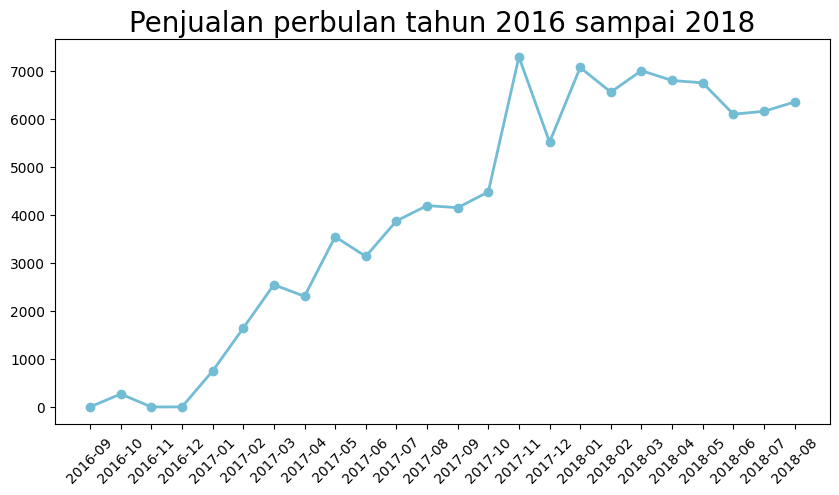

In [256]:
order_montly_df = main_data_df.resample(rule="ME", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "price" : "sum"})
order_montly_df.index = order_montly_df.index.strftime("%Y-%m")
order_montly_df = order_montly_df.reset_index()
order_montly_df.rename(columns={
    "order_id" : "order_count",
    "price": "revenue"}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(order_montly_df["order_purchase_timestamp"], order_montly_df["order_count"], marker="o", linewidth=2, color="#72BCD4")
plt.title("Penjualan perbulan tahun 2016 sampai 2018", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Dari hasil visualisasi tersebut dapat di lihat bahwa orderan dari beberapa bulan terakhir, dimana terdapat puncak tertinggi nya order di bulan Oktober 2017 namun menurun di bulan selanjutnya yaitu bulan November 2017. 

Membuat visualisasi line chart revenue perbulan.

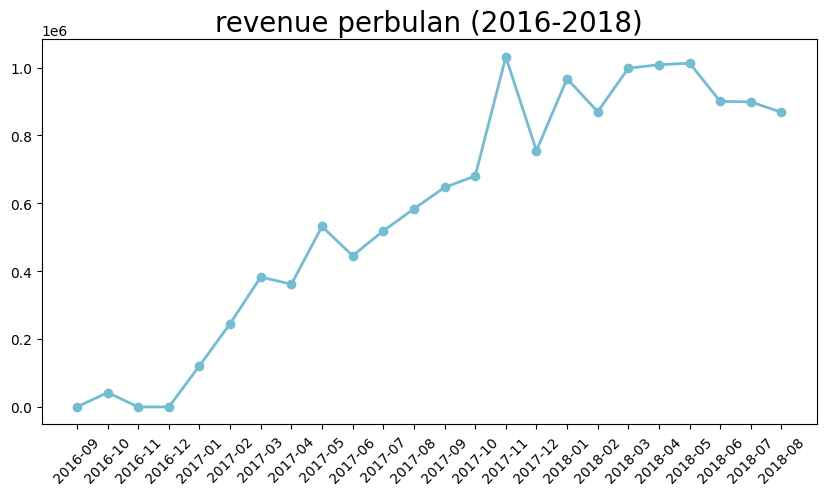

In [257]:
plt.figure(figsize=(10, 5))
plt.plot(
    order_montly_df["order_purchase_timestamp"],
    order_montly_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("revenue perbulan (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Dari hasil visualisasi tersebut, penuruna order pada november 2017 sangat berpengaruh terhadap revenue perusahaan

### Pertanyaan 2: Produk apa yang sangat sedikit dan sangat banyak terjual ? 

Untuk Mendapkan informasi terkait pertanyaan produk apa yang sangat sedikit dan sangat banyak terjual Kita perlu membuat dataframe baru untuk menampung group dari kolom apa saja yang di butuhkan. 

In [258]:
total_items_order_df = main_data_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
total_items_order_df.head(20)

product_category_name_english  order_item_id
0                    bed_bath_table        14602.0
1                   furniture_decor        11928.0
2                     health_beauty        11250.0
3                    sports_leisure        10109.0
4             computers_accessories        10043.0
5                        housewares         9324.0
6                     watches_gifts         6682.0
7                      garden_tools         6018.0
8                         telephony         5220.0
9                              auto         4953.0
10                             toys         4526.0
11                       cool_stuff         4207.0
12                        perfumery         3880.0
13                             baby         3478.0
14                      electronics         3132.0
15                       stationery         2867.0
16                 office_furniture         2647.0
17         fashion_bags_accessories         2372.0
18                         pet_shop         2341.0
19  construction_tools_construction         1308.0

Supaya mempermudah pengguna lain mengerti dalam identifikasi data produk mana yang sangat sedikit dan sangat banyak terjual kita akan membuat visualisasi dari hasil dataframe total_items_order_df

C:\Users\Wildan Septian\AppData\Local\Temp\ipykernel_988\1392449396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=total_items_order_df.head(5), palette=colors, ax=ax[0])
C:\Users\Wildan Septian\AppData\Local\Temp\ipykernel_988\1392449396.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=total_items_order_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


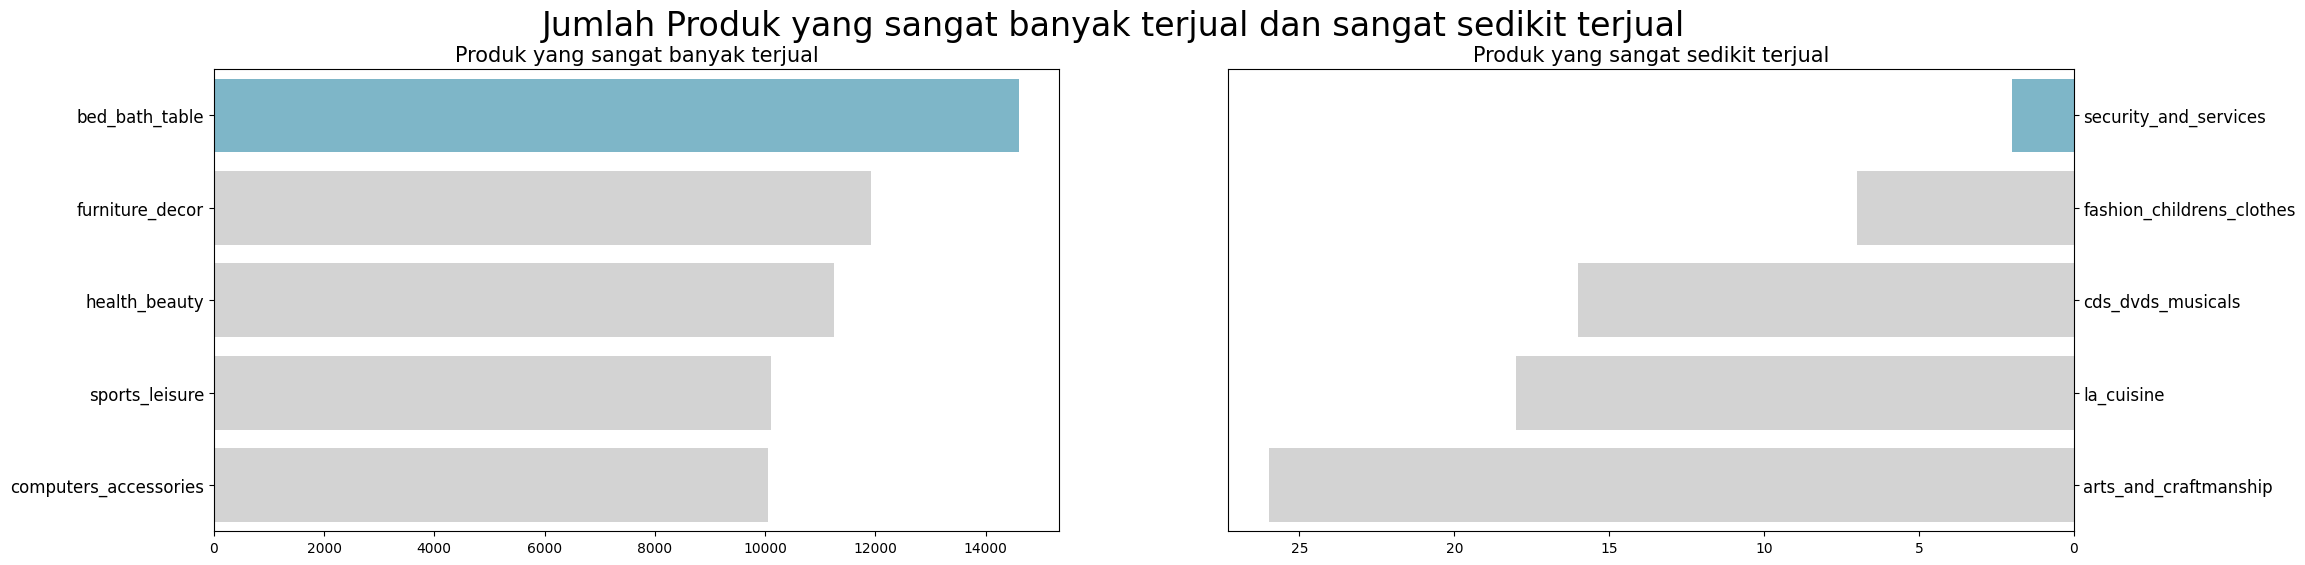

In [259]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=total_items_order_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk yang sangat banyak terjual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=total_items_order_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk yang sangat sedikit terjual", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Jumlah Produk yang sangat banyak terjual dan sangat sedikit terjual", fontsize=24)
plt.show()

Dari hasil visualisasi tersebut produk bed_bath_table adalah produk yang sangat banyak terjual dan produk security_and_services adalah produk yang sangat sedikit terjual.

## Conclusion

- Conclution pertanyaan 1
  Terdapat orderan terbanyak pada bulan oktober 2017 itu membuat revenue perusahaan naik dan di bulan selanjutnya yaitu bulan november orderan menurun sedikit dratis sehingga membuat revenue perusahaan menurun namun di bulan desember order kembali naik akan tetapi tidak menyamai kenaikan di bulan oktober, hingga bulan agustus 2018 masih terdapat kenikan dan penurunan namun tidak begitu besar masih di bawah kenaikan oktober dan tidak melewati penuruan terendah di bulan november.  
- Conclution pertanyaan 2
  Prdouk yang sangat laris terjual yaitu produk bed_bath_table dan di ikuti produk furniture_decor dan produk yang sangat sedikit terjual yaitu produk security_and_servis lalu di ikuti oleh produk fashion_childers_clothes.  